In [175]:
import numpy as np
import pandas as pd
from numpy import corrcoef
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
sns.set(style="darkgrid")



In [191]:
# Read the Cleaned Data
data = pd.read_csv('../data/Data/data.csv')
malidataidps = pd.read_csv('../data/Data/malidataidps.csv')

dimensions = ['reference_year','adm0_name','adm1_name','adm2_name','p35_density','actual_price','diff_price','fatalities','severity']
dimensionsidps = ['reference_year','adm0_name','adm1_name','adm2_name','p35_density','actual_price','diff_price','fatalities','severity','idps']
dims = ['p35_density','actual_price','diff_price','fatalities','severity']
corryears = [2016,2017,2018,2019,2020]

In [154]:
# Take just 2020 data and sort for p35_density
data20 = data[data.reference_year==2020].reset_index(drop=True)
data20 = data20.sort_values(by=['p35_density'],ascending=False).reset_index(drop=True)
data20[dimensions]


,reference_year,adm0_name,adm1_name,adm2_name,p35_density,actual_price,diff_price,fatalities,severity
0,2020,Burkina Faso,Sahel,Soum,0.4400,223.14,6.07,783,6.64
1,2020,Mali,Gao,Menaka,0.4100,261.09,10.00,33,1.22
2,2020,Mali,Gao,Bourem,0.3100,261.09,10.00,111,9.25
3,2020,Mali,Tombouctou,Gourma-Rharous,0.3000,233.20,13.38,245,5.70
4,2020,Mali,Mopti,Bandiagara,0.3000,181.29,10.98,446,4.05
5,2020,Mali,Mopti,Koro,0.2900,181.29,10.98,451,2.14
6,2020,Burkina Faso,Sahel,Oudalan,0.2800,223.14,6.07,674,5.86
7,2020,Mali,Mopti,Douentza,0.2700,181.29,10.98,427,3.56
8,2020,Burkina Faso,Est,Komonjdjari,0.2600,171.12,12.98,31,1.82
9,2020,Niger,Tillaberi,Banibangou,0.2500,236.99,7.80,401,15.42


# Table 3.1 for Methodology Chapter

In [176]:
# From the 2020 data we analyse and compare the 3 provinces with higher percentage of population in food insecure state
top1 = data20[data20.p35_density > 0.411]
m = malidataidps
m=m[(m.p35_density > 0.301) & (m.reference_year==2020)].sort_values(by=['p35_density'],ascending=False)
t = top1.append(m).reset_index(drop=True)
top3 = t[dimensionsidps]
top3


,reference_year,adm0_name,adm1_name,adm2_name,p35_density,actual_price,diff_price,fatalities,severity,idps
0,2020,Burkina Faso,Sahel,Soum,0.44,223.14,6.07,783,6.64,NaN
1,2020,Mali,Gao,Menaka,0.41,261.09,10.00,33,1.22,62973.0
2,2020,Mali,Gao,Bourem,0.31,261.09,10.00,111,9.25,34422.0


In [166]:
# Total 3 problematic provinces:
totop1 = data[data.adm2_name.isin(['Soum'])]#,'Menaka','Bourem'])]
tom = malidataidps
tom=tom[tom.adm2_name.isin(['Menaka','Bourem'])]
toto = totop1.append(tom).sort_values(by=['reference_year','adm2_name'],ascending=False).reset_index(drop=True)
#toto.reset_index(inplace = True,drop=True)
totop3=toto[dimensionsidps]

totop3


,reference_year,adm0_name,adm1_name,adm2_name,p35_density,actual_price,diff_price,fatalities,severity,idps
0,2020,Burkina Faso,Sahel,Soum,0.440,223.14,6.07,783,6.64,NaN
1,2020,Mali,Gao,Menaka,0.410,261.09,10.00,33,1.22,62973.0
2,2020,Mali,Gao,Bourem,0.310,261.09,10.00,111,9.25,34422.0
3,2019,Burkina Faso,Sahel,Soum,0.230,216.14,13.06,923,5.46,NaN
4,2019,Mali,Gao,Menaka,0.240,250.87,0.22,273,7.38,17758.0
5,2019,Mali,Gao,Bourem,0.210,250.87,0.22,5,0.45,10573.0
6,2018,Burkina Faso,Sahel,Soum,0.237,259.14,29.93,161,1.96,NaN
7,2018,Mali,Gao,Menaka,0.210,275.11,24.02,384,6.86,12543.0
8,2018,Mali,Gao,Bourem,0.210,275.11,24.02,28,2.15,6405.0
9,2017,Burkina Faso,Sahel,Soum,0.030,245.57,16.36,64,1.23,NaN


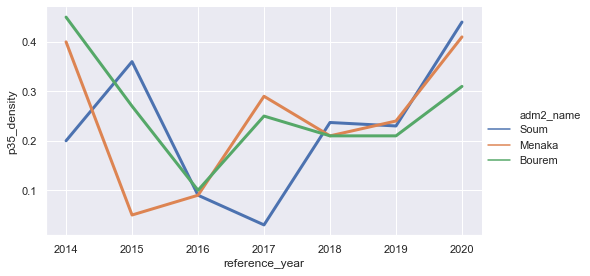

In [177]:
#adm2 Percentage of food insecure people in most problematic provinces each year
sns.relplot(x="reference_year", y="p35_density", hue="adm2_name",
            height=4, aspect=1.75, linewidth=3,
            kind="line", estimator=None, data=totop3);

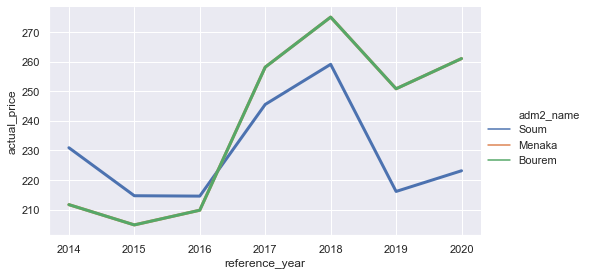

In [178]:
#adm2 Average millet price in most problematic provinces each year (FCFA) 
sns.relplot(x="reference_year", y="actual_price", hue="adm2_name",
            height=4, aspect=1.75, linewidth=3,
            kind="line", estimator=None, data=totop3);

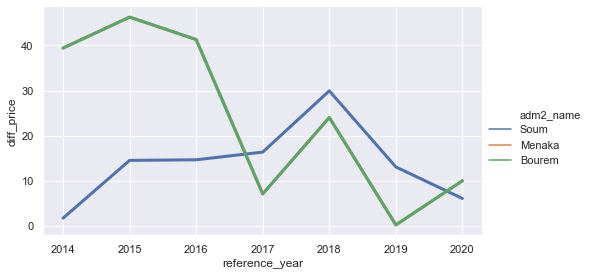

In [179]:
#adm2 Average millet price variation in most problematic provinces each year (FCFA) 
sns.relplot(x="reference_year", y="diff_price", hue="adm2_name",
            height=4, aspect=1.75, linewidth=3,
            kind="line", estimator=None, data=totop3);

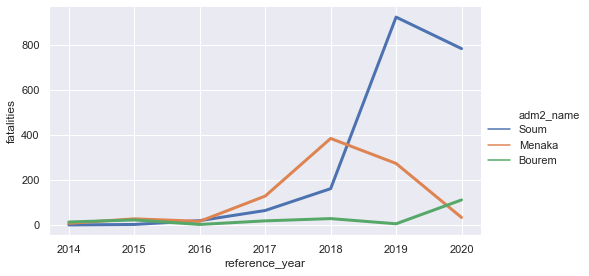

In [180]:
#adm2 Violent conflicts fatalities in most problematic provinces each year
sns.relplot(x="reference_year", y="fatalities", hue="adm2_name",
            height=4, aspect=1.75, linewidth=3,
            kind="line", estimator=None, data=totop3);

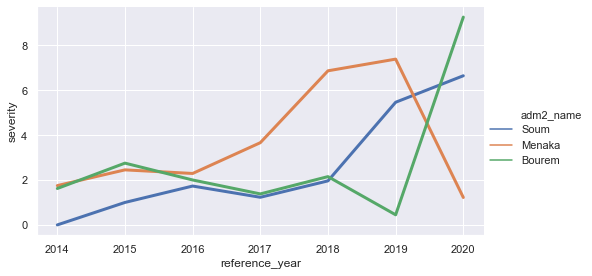

In [181]:
#adm2 Violent conflicts severity in most problematic provinces each year
sns.relplot(x="reference_year", y="severity", hue="adm2_name",
            height=4, aspect=1.75, linewidth=3,
            kind="line", estimator=None, data=totop3);

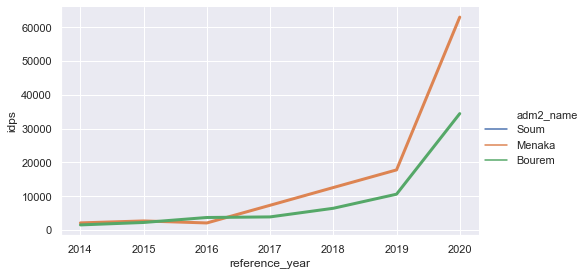

In [182]:
#adm2 IDPs in most problematic provinces each year
sns.relplot(x="reference_year", y="idps", hue="adm2_name",
            height=4, aspect=1.75, linewidth=3,
            kind="line", estimator=None, data=totop3);

In [192]:
datacorr = data[data.reference_year.isin(corryears)]
datacorr.groupby(['reference_year','adm0_name'])[dims].mean().round(2)
#data.groupby(['reference_year','adm0_name']).mean().round(2)


p35_density  actual_price  diff_price  \
reference_year adm0_name                                             
2016           Burkina Faso         0.06        200.59       14.09   
               Mali                 0.06        191.56       27.25   
               Niger                0.08        227.28       13.26   
2017           Burkina Faso         0.06        232.49       17.81   
               Mali                 0.10        228.90       10.08   
               Niger                0.09        261.61       21.07   
2018           Burkina Faso         0.11        247.84       33.16   
               Mali                 0.11        248.96       30.15   
               Niger                0.07        261.34       20.80   
2019           Burkina Faso         0.14        198.90       15.77   
               Mali                 0.11        220.68        1.98   
               Niger                0.14        222.39       18.15   
2020           Burkina Faso         0.28        202.14       12.54   
               Mali                 0.20        212.95       11.20   
               Niger                0.15        236.27        6.65   

                             fatalities  severity  
reference_year adm0_name                           
2016           Burkina Faso        4.57      0.71  
               Mali               10.73      1.72  
               Niger               4.00      3.45  
2017           Burkina Faso       10.86      0.73  
               Mali               41.60      2.25  
               Niger               6.70      3.04  
2018           Burkina Faso       26.71      0.73  
               Mali               98.67      3.01  
               Niger              17.90      2.04  
2019           Burkina Faso      204.14      3.73  
               Mali              113.53      2.59  
               Niger              28.50      2.98  
2020           Burkina Faso      304.43      4.96  
               Mali              196.20      3.99  
               Niger             103.00      3.99

In [127]:
data.groupby(['adm0_name','adm2_name'])['p35_density','actual_price','diff_price','fatalities','severity'].mean().sort_values(by=['p35_density'],ascending=False).round(2)


p35_density  actual_price  diff_price  \
adm0_name    adm2_name                                               
Mali         Bourem                 0.26        238.79       24.04   
             Menaka                 0.24        238.79       24.04   
Niger        Banibangou             0.23        243.63       13.25   
Burkina Faso Soum                   0.23        229.17       13.76   
Niger        Ouallam                0.22        243.63       13.25   
Burkina Faso Oudalan                0.22        229.17       13.76   
Mali         Gourma-Rharous         0.21        243.73       13.50   
             Gao                    0.18        238.79       24.04   
             Ansongo                0.16        238.79       24.04   
             Bandiagara             0.16        188.02       18.39   
             Douentza               0.14        188.02       18.39   
Burkina Faso Komonjdjari            0.14        184.43       16.75   
Mali         Niafunke               0.14        243.73       13.50   
Burkina Faso Seno                   0.11        229.17       13.76   
Mali         Tenenkou               0.11        188.02       18.39   
Niger        Tillia                 0.11        226.18       21.36   
Mali         Koro                   0.10        188.02       18.39   
Niger        Filingue               0.08        243.63       13.25   
             Tahoua                 0.07        226.18       21.36   
Mali         Djenne                 0.07        188.02       18.39   
Niger        Tera                   0.07        243.63       13.25   
Burkina Faso Yagha                  0.06        229.17       13.76   
Mali         Dire                   0.06        243.73       13.50   
Niger        Say                    0.06        243.63       13.25   
             Tillaberi              0.06        243.63       13.25   
             Tassara                0.06        226.18       21.36   
Burkina Faso Loroum                 0.06        198.11       20.66   
Mali         Youwarou               0.05        188.02       18.39   
             Mopti                  0.05        188.02       18.39   
             Bankass                0.04        188.02       18.39   
Burkina Faso Yatenga                0.04        198.11       20.66   
Niger        Kollo                  0.03        243.63       13.25   

                             fatalities  severity  
adm0_name    adm2_name                             
Mali         Bourem               28.43      2.80  
             Menaka              124.00      3.66  
Niger        Banibangou           59.43      3.77  
Burkina Faso Soum                278.86      2.57  
Niger        Ouallam              22.00      3.53  
Burkina Faso Oudalan             115.43      1.77  
Mali         Gourma-Rharous       56.57      2.59  
             Gao                  72.43      2.85  
             Ansongo              65.29      1.81  
             Bandiagara           95.00      1.58  
             Douentza            155.14      2.63  
Burkina Faso Komonjdjari          10.86      0.89  
Mali         Niafunke             11.71      2.54  
Burkina Faso Seno                 17.43      1.25  
Mali         Tenenkou             47.14      2.58  
Niger        Tillia               13.00      2.63  
Mali         Koro                147.43      2.75  
Niger        Filingue             38.29      3.71  
             Tahoua                0.71      0.36  
Mali         Djenne               36.00      2.59  
Niger        Tera                  6.29      0.92  
Burkina Faso Yagha                43.00      1.27  
Mali         Dire                  2.86      0.96  
Niger        Say                  11.14      0.54  
             Tillaberi            75.00      2.78  
             Tassara               4.57      4.57  
Burkina Faso Loroum               50.29      1.56  
Mali         Youwarou             18.86      2.31  
             Mopti                66.29      3.30  
             Bankass             109

In [129]:
malidataidps.groupby(['adm0_name','adm2_name'])['p35_density','idps'].mean().sort_values(by=['p35_density'],ascending=False).round(2)


p35_density      idps
adm0_name adm2_name                            
Mali      Bourem                 0.26   8945.71
          Menaka                 0.24  15338.14
          Gourma-Rharous         0.21   7132.14
          Gao                    0.18  24705.57
          Ansongo                0.16   8853.43
          Bandiagara             0.16   9795.43
          Douentza               0.14   4065.57
          Niafunke               0.14   2849.57
          Tenenkou               0.11   2734.14
          Koro                   0.10  14205.14
          Djenne                 0.07   4294.00
          Dire                   0.06   1479.57
          Youwarou               0.05    689.29
          Mopti                  0.05  14797.86
          Bankass                0.04  13777.86

In [108]:
malidataidps[malidataidps.p35_density > 0.301]

,reference_year,adm0_name,adm1_name,adm2_name,population,phase35,p35_density,actual_price,decade_price,diff_price,fatalities,severity,idps
0,2014,Mali,Gao,Ansongo,157184,56586,0.36,211.68,251.09,39.41,9,2.25,1888
1,2014,Mali,Gao,Bourem,138610,62374,0.45,211.68,251.09,39.41,13,1.62,1484
2,2014,Mali,Gao,Gao,285337,156935,0.55,211.68,251.09,39.41,82,5.86,1794
3,2014,Mali,Gao,Menaka,64869,25948,0.40,211.68,251.09,39.41,7,1.75,2079
4,2014,Mali,Mopti,Bandiagara,373461,224077,0.60,174.78,192.26,17.48,0,0.00,80
13,2014,Mali,Tombouctou,Gourma-Rharous,132293,41011,0.31,239.80,246.58,6.78,0,0.00,626
14,2014,Mali,Tombouctou,Niafunke,209035,114969,0.55,239.80,246.58,6.78,0,0.00,1112
91,2020,Mali,Gao,Bourem,164481,50989,0.31,261.09,251.09,10.00,111,9.25,34422
93,2020,Mali,Gao,Menaka,76976,31560,0.41,261.09,251.09,10.00,33,1.22,62973


In [ ]:
malidataidps.groupby(['reference_year','adm0_name']).mean().round(2)


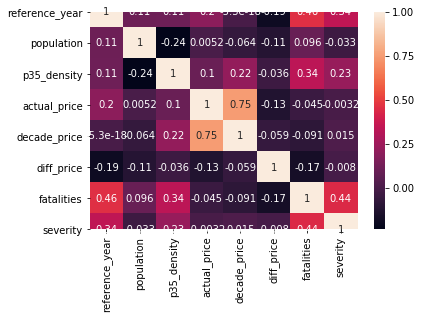

In [95]:
sns.heatmap(data.corr(), annot=True)
plt.show()


In [96]:
#data[data.adm2_name.isin(['Soum','Menaka','Bourem'])]
data[data.adm2_name == 'Soum']

,reference_year,adm0_name,adm1_name,adm2_name,population,p35_density,actual_price,decade_price,diff_price,fatalities,severity
5,2014,Burkina Faso,Sahel,Soum,440647,0.200,230.93,229.21,1.72,0,0.00
37,2015,Burkina Faso,Sahel,Soum,454634,0.360,214.69,229.21,14.52,2,1.00
69,2016,Burkina Faso,Sahel,Soum,468949,0.090,214.56,229.21,14.65,19,1.73
101,2017,Burkina Faso,Sahel,Soum,483423,0.030,245.57,229.21,16.36,64,1.23
133,2018,Burkina Faso,Sahel,Soum,498409,0.237,259.14,229.21,29.93,161,1.96
165,2019,Burkina Faso,Sahel,Soum,513727,0.230,216.14,229.21,13.06,923,5.46
197,2020,Burkina Faso,Sahel,Soum,529371,0.440,223.14,229.21,6.07,783,6.64


In [97]:
data[data.adm2_name == 'Menaka']

,reference_year,adm0_name,adm1_name,adm2_name,population,p35_density,actual_price,decade_price,diff_price,fatalities,severity
10,2014,Mali,Gao,Menaka,64869,0.40,211.68,251.09,39.41,7,1.75
42,2015,Mali,Gao,Menaka,66777,0.05,204.82,251.09,46.27,27,2.45
74,2016,Mali,Gao,Menaka,68785,0.09,209.79,251.09,41.30,16,2.29
106,2017,Mali,Gao,Menaka,70793,0.29,258.18,251.09,7.09,128,3.66
138,2018,Mali,Gao,Menaka,70793,0.21,275.11,251.09,24.02,384,6.86
170,2019,Mali,Gao,Menaka,72802,0.24,250.87,251.09,0.22,273,7.38
202,2020,Mali,Gao,Menaka,76976,0.41,261.09,251.09,10.00,33,1.22


In [98]:
data[data.adm2_name == 'Bourem']

,reference_year,adm0_name,adm1_name,adm2_name,population,p35_density,actual_price,decade_price,diff_price,fatalities,severity
8,2014,Mali,Gao,Bourem,138610,0.45,211.68,251.09,39.41,13,1.62
40,2015,Mali,Gao,Bourem,142686,0.27,204.82,251.09,46.27,22,2.75
72,2016,Mali,Gao,Bourem,146978,0.10,209.79,251.09,41.30,2,2.00
104,2017,Mali,Gao,Bourem,151269,0.25,258.18,251.09,7.09,18,1.38
136,2018,Mali,Gao,Bourem,151269,0.21,275.11,251.09,24.02,28,2.15
168,2019,Mali,Gao,Bourem,155560,0.21,250.87,251.09,0.22,5,0.45
200,2020,Mali,Gao,Bourem,164481,0.31,261.09,251.09,10.00,111,9.25


In [99]:
pd.DataFrame({'p35_density' : data.groupby(['reference_year'])['p35_density'].mean()}).round(4)


,p35_density
reference_year,
2014,0.1741
2015,0.0873
2016,0.0670
2017,0.0869
2018,0.0980
2019,0.1227
2020,0.2009


In [100]:
pd.DataFrame({'actual_price' : data.groupby(['reference_year'])['actual_price'].mean()}).round(2)


,actual_price
reference_year,
2014,216.09
2015,199.36
2016,204.70
2017,239.91
2018,252.58
2019,216.45
2020,217.87


In [101]:
pd.DataFrame({'fatalities' : data.groupby(['reference_year'])['fatalities'].mean()}).round(2)


,fatalities
reference_year,
2014,4.06
2015,7.41
2016,7.28
2017,23.97
2018,57.69
2019,106.78
2020,190.75


In [118]:
malidataidps.groupby(['reference_year','adm0_name']).mean().round(2)


,,population,phase35,p35_density,actual_price,decade_price,diff_price,fatalities,severity,idps
reference_year,adm0_name,,,,,,,,,
2014,Mali,242932.47,58262.00,0.26,197.62,218.81,21.19,7.47,0.83,1138.07
2015,Mali,243205.13,16314.33,0.09,188.24,218.81,30.58,15.60,3.05,1630.47
2016,Mali,250411.07,11725.73,0.06,191.56,218.81,27.25,10.73,1.72,1216.40
2017,Mali,257656.07,19519.60,0.10,228.90,218.81,10.08,41.60,2.25,1410.67
2018,Mali,257656.07,26690.53,0.11,248.96,218.81,30.15,98.67,3.01,6227.93
2019,Mali,265034.47,26198.60,0.11,220.68,218.81,1.98,113.53,2.59,10684.53
2020,Mali,280321.07,54197.20,0.20,212.95,218.81,11.20,196.20,3.99,40068.20


In [104]:
#data[['p35_density','actual_price','fatalities']].round(2)
malidataidps[malidataidps.reference_year == 2020].describe().round(4)

,reference_year,population,p35_density,actual_price,decade_price,diff_price,fatalities,severity,idps
count,15.0,15.0000,15.0000,15.000,15.0000,15.0000,15.0000,15.0000,15.0000
mean,2020.0,280321.0667,0.1980,212.952,218.8120,11.1987,196.2000,3.9940,40068.2000
std,0.0,138822.1366,0.1174,36.370,29.4239,1.2073,168.2142,2.7069,31224.0633
min,2020.0,76976.0000,0.0500,181.290,192.2600,10.0000,0.0000,0.0000,774.0000
25%,2020.0,160716.0000,0.1000,181.290,192.2600,10.4900,42.0000,2.1700,13993.5000
50%,2020.0,247996.0000,0.2400,181.290,192.2600,10.9800,161.0000,3.5800,34422.0000
75%,2020.0,361445.5000,0.2950,247.145,248.8350,10.9800,321.5000,5.7150,63420.0000
max,2020.0,521466.0000,0.4100,261.090,251.0900,13.3800,451.0000,9.2500,110202.0000
